In [ ]:
#Credit_card Fraud Detection feature selection
#
# EDA
# Feature Selection using  RFE
# Feature selection using Lasso
# Feature selection using Correlation and HeatMap
#
# Testing for accuracy of fraud cases using AutoEncoders for feature selection
# and KNN for classification
# Testing using DNNs and Autoencoders

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
# Some features like Longitude and Latitude are dropped
#data = pd.read_csv('/content/gdrive/MyDrive/Swarm/CreditcardfraudDatacsvDroppped.csv',sep=',')
data = pd.read_csv('/content/gdrive/MyDrive/Swarm/CreditcardfraudDatacsvDroppped.csv',sep=',')

data.head()

,cc_num,merchant,category,amt,gender,unix_time,is_fraud,previous_fraud_history,no_of_fraud_attempts,session,Age,Weekday,Week,city,job
0,4.930000e+15,Bradtke PLC,grocery_pos,368.78,F,1353986134,1,Yes,4,sleep,46,Weekday,Wednesday,Cherokee Village,Pharmacologist
1,3.590000e+15,Rau and Sons,grocery_pos,356.20,F,1362903771,1,Yes,1,working,52,Weekday,Tuesday,Spencer,"Development worker, international aid"
2,4.250000e+15,Koepp-Witting,grocery_pos,333.39,M,1343446145,1,Yes,4,sleep,68,Weekend,Sunday,Allentown,Radio producer
3,4.430000e+15,Koepp-Parker,grocery_pos,318.65,F,1369269075,1,Yes,0,sleep,88,Weekend,Saturday,Gaithersburg,Clinical biochemist
4,3.560000e+15,"Herman, Treutel and Dickens",misc_net,736.28,M,1367882397,1,Yes,3,sleep,39,Weekday,Wednesday,Ringwood,Outdoor activities/education manager


In [ ]:
data.shape

(100000, 15)

In [ ]:
data.isnull().values.sum()

0

In [ ]:
data.value_counts(data['is_fraud'])

is_fraud
0    99479
1      521
Name: count, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   cc_num                  100000 non-null  float64
 1   merchant                100000 non-null  object 
 2   category                100000 non-null  object 
 3   amt                     100000 non-null  float64
 4   gender                  100000 non-null  object 
 5   unix_time               100000 non-null  int64  
 6   is_fraud                100000 non-null  int64  
 7   previous_fraud_history  100000 non-null  object 
 8   no_of_fraud_attempts    100000 non-null  int64  
 9   session                 100000 non-null  object 
 10  Age                     100000 non-null  int64  
 11  Weekday                 100000 non-null  object 
 12  Week                    100000 non-null  object 
 13  city                    100000 non-null  object 
 14  job                  

In [ ]:
#Stats
normal_df = data[data['is_fraud']==0]
fraud_df = data[data['is_fraud']==1]

In [ ]:
normal_df.amt.describe()

count    99479.000000
mean        67.219770
std        145.456268
min          1.000000
25%          9.650000
50%         47.160000
75%         82.460000
max      17897.240000
Name: amt, dtype: float64

In [ ]:
fraud_df.amt.describe()

count     521.000000
mean      511.632879
std       387.011581
min         2.460000
25%       216.250000
50%       355.180000
75%       892.530000
max      1292.210000
Name: amt, dtype: float64

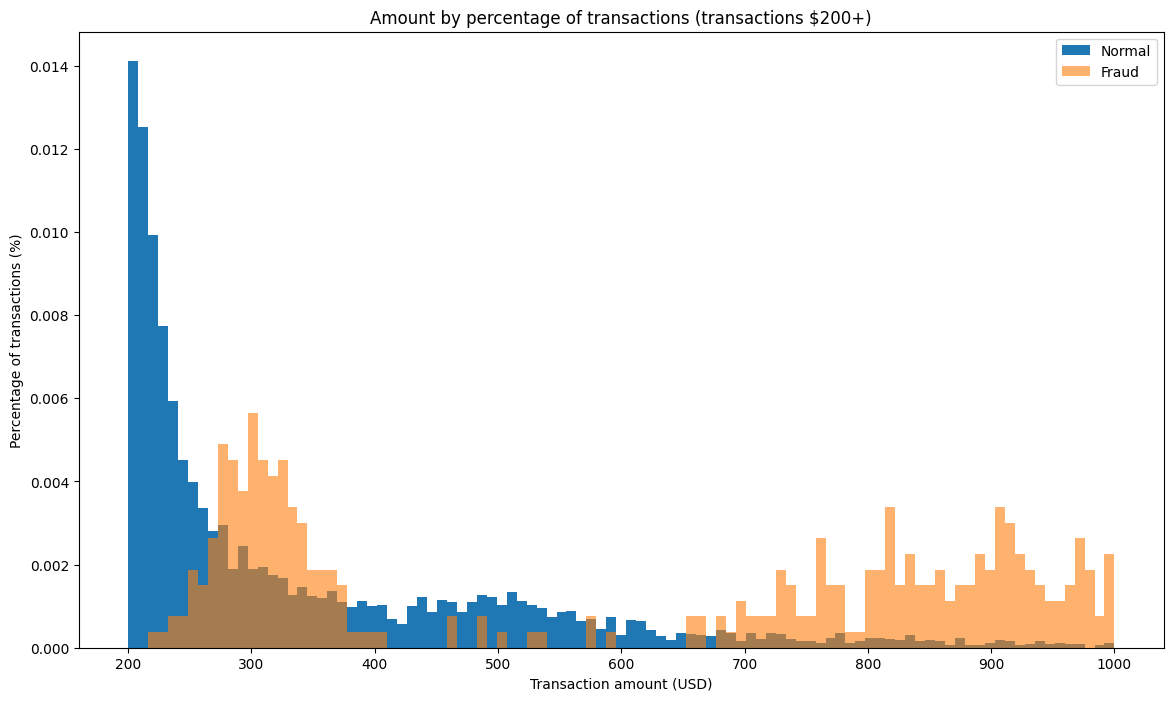

In [ ]:
# EDA
# Plot of Fraud and Non-Fraud transactions
# plot of 200 +  high value transactions to differentiate fraud and normal distribution
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
bins = np.linspace(200, 1000, 100)
plt.figure(figsize=(14, 8))
plt.hist(normal_df.amt, bins, alpha=1, density=True, label='Normal')
plt.hist(fraud_df.amt, bins, alpha=0.6, density=True, label='Fraud')
plt.legend(loc='upper right')
plt.title("Amount by percentage of transactions (transactions \$200+)")
plt.xlabel("Transaction amount (USD)")
plt.ylabel("Percentage of transactions (%)");
plt.show()

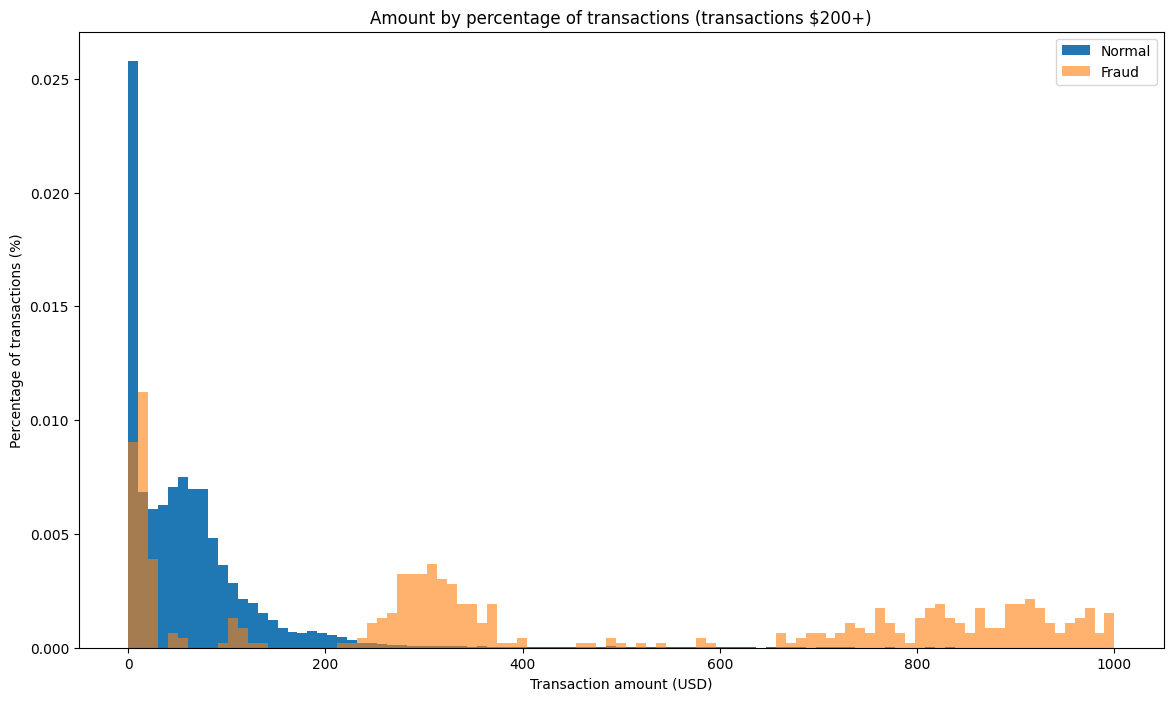

In [ ]:
# EDA
# Plot of Fraud and Non-Fraud transactions
#From 0+
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
bins = np.linspace(0, 1000, 100)
plt.figure(figsize=(14, 8))
plt.hist(normal_df.amt, bins, alpha=1, density=True, label='Normal')
plt.hist(fraud_df.amt, bins, alpha=0.6, density=True, label='Fraud')
plt.legend(loc='upper right')
plt.title("Amount by percentage of transactions (transactions \$200+)")
plt.xlabel("Transaction amount (USD)")
plt.ylabel("Percentage of transactions (%)");
plt.show()

In [ ]:
 # label encoding
 # Separate features and target variable
features = data.drop('is_fraud', axis=1)
target = data['is_fraud']

# Function to encode categorical features with label encoding
def encode_categorical(df):
    categorical_cols = [col for col in df.columns if df[col].dtype == 'object']
    for col in categorical_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
    return df

# Apply label encoding to categorical features
features = encode_categorical(features.copy())
print(features.head())


         cc_num  merchant  category     amt  gender   unix_time  \
0  4.930000e+15        73         4  368.78       0  1353986134   
1  3.590000e+15       494         4  356.20       0  1362903771   
2  4.250000e+15       329         4  333.39       1  1343446145   
3  4.430000e+15       328         4  318.65       0  1369269075   
4  3.560000e+15       245         8  736.28       1  1367882397   

   previous_fraud_history  no_of_fraud_attempts  session  Age  Weekday  Week  \
0                       1                     4        1   46        0     6   
1                       1                     1        2   52        0     5   
2                       1                     4        1   68        1     3   
3                       1                     0        1   88        1     2   
4                       1                     3        1   39        0     6   

   city  job  
0   136  330  
1   739  128  
2    11  379  
3   270   85  
4   667  319  


In [ ]:
#Feature Selection
# Using chi square test
from sklearn.feature_selection import chi2

# Assuming you have encoded features (`features`) and target variable (`target`)

# Calculate chi-square scores and p-values
chi2_scores, p_values = chi2(features, target)

# Print the results in a pandas dataframe for easy viewing
results = pd.DataFrame({'feature': features.columns, 'chi2_score': chi2_scores, 'p_value': p_values})
print(results.sort_values(by=['p_value'], ascending=True))  # Sort by p-value

# Set a threshold for p-value (e.g., 0.05) to identify significant features
p_val_threshold = 0.05
significant_features = results[results['p_value'] <= p_val_threshold]['feature'].tolist()

# Print the significant features
print("Significant Features (p-value <=", p_val_threshold, "):")
print(significant_features)

# Keep only these features in the final dataset (optional)
# selected_features = features[significant_features]


                   feature    chi2_score        p_value
0                   cc_num  1.698590e+18   0.000000e+00
3                      amt  1.472104e+06   0.000000e+00
5                unix_time  3.255592e+06   0.000000e+00
7     no_of_fraud_attempts  2.998332e+04   0.000000e+00
6   previous_fraud_history  1.339279e+03  3.291501e-293
12                    city  2.533911e+02   4.733259e-57
2                 category  8.770597e+01   7.594486e-21
9                      Age  6.951119e+01   7.598230e-17
8                  session  6.211346e+01   3.242275e-15
4                   gender  7.009824e+00   8.106366e-03
10                 Weekday  5.429203e+00   1.980271e-02
11                    Week  9.133053e-01   3.392390e-01
1                 merchant  2.287860e-03   9.618505e-01
13                     job  2.085257e-03   9.635776e-01
Significant Features (p-value <= 0.05 ):
['cc_num', 'category', 'amt', 'gender', 'unix_time', 'previous_fraud_history', 'no_of_fraud_attempts', 'session', 'Age'

In [ ]:
#Feature Selection using correlation

# Assuming you have encoded features (`features`) and target variable (`target`)

# Check if features is a DataFrame (optional)
if not isinstance(features, pd.DataFrame):
  # Convert features to DataFrame if necessary
  features = pd.DataFrame(features)

# Calculate correlation coefficients between features and target
correlations = features.corrwith(target)

# Create a DataFrame with feature names as index
correlation_matrix = pd.DataFrame(correlations, columns=['Correlation'])
correlation_matrix.index.name = 'Feature'  # Set feature names as index

# Print the correlation matrix
print(correlation_matrix)
# Set a threshold for absolute correlation coefficient (optional)
corr_threshold = 0.3  # You can adjust this value based on your needs

# Identify features with strong correlations (positive or negative)
important_features = correlations[abs(correlations) >= corr_threshold].index

# Print the important features
print("Important Features (Absolute Correlation >=", corr_threshold, "):")
print(important_features.tolist())


         Correlation
Feature             
0          -0.002033
1          -0.000014
2           0.018891
3           0.211657
4           0.011328
5          -0.011574
6           0.120162
7           0.385267
8          -0.031222
9           0.010715
10         -0.008981
11          0.002689
12         -0.004187
13          0.000016
Important Features (Absolute Correlation >= 0.3 ):
[7]


In [ ]:
# Feature 7     no_of_fraud_attempts is > 0.3
# Feature 3 amt
# Feature 2 Catgory
# Feature 4 Gender
# Chosen Features

In [ ]:
#Feature Selection using RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression  # Example estimator

# Assuming you have encoded features (`features`) and target variable (`target`)

# Create the RFE object (estimator, number of features to select)
selector = RFE(estimator=LogisticRegression(), n_features_to_select=10, step=1)  # Adjust parameters as needed

# Fit the RFE model (performs feature selection)
selector.fit(features, target)

# Get the selected features
selected_features = features.iloc[:, selector.support_]

# Print the selected features
print("Selected Features using RFE:")
print(features.columns[selector.support_])

# Optional: Use the selected features for further analysis or model training


Selected Features using RFE:
Index([2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64', name='Feature')


In [ ]:
# Feature Selection using LASSO
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler  # Import scaler

# Assuming you have encoded features (`features`) and target variable (`target`)

# Standardize features (optional, but recommended)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Create the LASSO model with regularization parameter (alpha)
lasso = Lasso(alpha=0.01)  # Start with a lower alpha

# Create feature selection object using the LASSO model
selector = SelectFromModel(lasso)

# Fit the model (performs feature selection)
selector.fit(features_scaled, target)

# Get the selected features
selected_features = features.iloc[:, selector.get_support()]

# Print the selected features
print("Selected Features using LASSO:")
print(features.columns[selector.get_support()])

# Optional: Use the selected features for further analysis or model training
# Feature 3 amt and Feature 7  no_of_fraud_attempts were chosen

Selected Features using LASSO:
Index([3, 7], dtype='int64', name='Feature')


In [ ]:
# Feature scaling (consider standardization if features have different scales)
scaler = StandardScaler()
features = scaler.fit_transform(features)


# Split data into training and testing sets (stratify to preserve class distribution)
train_x, test_x, train_y, test_y = train_test_split(features, target,
                                                   test_size=0.2,
                                                   random_state=42,
                                                   stratify=target)

In [ ]:
# Autoencoder model for feature extraction
autoencoder = Sequential()
autoencoder.add(Dense(256, activation='relu', input_shape=(train_x.shape[1],)))  # Encoder
autoencoder.add(Dense(128, activation='relu'))  # Code bottleneck layer (feature extraction)
autoencoder.add(Dense(256, activation='relu'))  # Decoder
autoencoder.add(Dense(train_x.shape[1], activation='sigmoid'))  # Output layer

# Compile the autoencoder model
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy')

# Train the autoencoder model
autoencoder.fit(train_x, train_x, epochs=20, batch_size=32, validation_data=(test_x, test_x))

# Define a function to extract features from the bottleneck layer of the autoencoder model
encoder = Sequential()
encoder.add(autoencoder.layers[0])  # Encoder layer 1
encoder.add(autoencoder.layers[1])  # Encoder layer 2

# Extract features from the bottleneck layer
encoded_train = encoder.predict(train_x)
encoded_test = encoder.predict(test_x)

# Train a Random Forest Classifier using the encoded features
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(encoded_train, train_y)

# Make predictions on the test set and evaluate the model
predictions = rf_model.predict(encoded_test)
print(classification_report(test_y, predictions))

from sklearn.metrics import confusion_matrix
print("Confusion Matrix:\n", confusion_matrix(test_y, predictions))


Epoch 1/20
2500/2500 [==============================] - 16s 5ms/step - loss: -248841920.0000 - val_loss: -1104007680.0000
Epoch 2/20
2500/2500 [==============================] - 8s 3ms/step - loss: -4915319296.0000 - val_loss: -10639400960.0000
Epoch 3/20
2500/2500 [==============================] - 10s 4ms/step - loss: -22958999552.0000 - val_loss: -37939224576.0000
Epoch 4/20
2500/2500 [==============================] - 11s 4ms/step - loss: -64779489280.0000 - val_loss: -93929185280.0000
Epoch 5/20
2500/2500 [==============================] - 9s 4ms/step - loss: -141659127808.0000 - val_loss: -189935992832.0000
Epoch 6/20
2500/2500 [==============================] - 10s 4ms/step - loss: -267070406656.0000 - val_loss: -340774649856.0000
Epoch 7/20
2500/2500 [==============================] - 10s 4ms/step - loss: -457453142016.0000 - val_loss: -563181453312.0000
Epoch 8/20
2500/2500 [==============================] - 8s 3ms/step - loss: -730192281600.0000 - val_loss: -874662723584.0000

In [ ]:
#Classification of Fraud and Non-fraud using Autoencoders feature selection
# Random forest for classification
#
import pandas as pd

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

#data = pd.read_csv('/content/gdrive/MyDrive/Swarm/CreditCardFraudVilma.csv')
#data = pd.read_csv('/content/gdrive/MyDrive/Swarm/credit_cardfraudData.csv',sep=',')
data = pd.read_csv('/content/gdrive/MyDrive/Swarm/CreditcardfraudDatacsvDroppped.csv',sep=',')
features = data.drop('is_fraud', axis=1)
target = data['is_fraud']

# Function to encode categorical features with label encoding
def encode_categorical(df):
    categorical_cols = [col for col in df.columns if df[col].dtype == 'object']
    for col in categorical_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
    return df

# Apply label encoding to categorical features
features = encode_categorical(features.copy())

# Feature scaling (consider standardization if features have different scales)
scaler = StandardScaler()
features = scaler.fit_transform(features)

# **SMOTE for balancing the class distribution:**
smote = SMOTE(random_state=42)
features_resampled, target_resampled = smote.fit_resample(features, target)

# Split data into training and testing sets (using the resampled data)
train_x, test_x, train_y, test_y = train_test_split(features_resampled, target_resampled,
                                                    test_size=0.2, random_state=42, stratify=target_resampled)

# Define the autoencoder model for feature extraction
autoencoder = Sequential()
autoencoder.add(Dense(256, activation='relu', input_shape=(train_x.shape[1],)))  # Encoder
autoencoder.add(Dense(128, activation='relu'))  # Code bottleneck layer (feature extraction)
autoencoder.add(Dense(256, activation='relu'))  # Decoder
autoencoder.add(Dense(train_x.shape[1], activation='sigmoid'))  # Output layer

# Compile the autoencoder model
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy')

# Train the autoencoder model
autoencoder.fit(train_x, train_x, epochs=20, batch_size=32, validation_data=(test_x, test_x))

# Define a function to extract features from the bottleneck layer of the autoencoder model
encoder = Sequential()
encoder.add(autoencoder.layers[0])  # Encoder layer 1
encoder.add(autoencoder.layers[1])  # Encoder layer 2

# Extract features from the bottleneck layer
encoded_train = encoder.predict(train_x)
#encoded_test = encoder.predict(test_x)

# Filter original fraud data
fraud_data = data[data['is_fraud'] == 1]

# Separate original non-fraud data
non_fraud_data = data[data['is_fraud'] == 0]

# Preprocess original non-fraud data (same steps as training features)
non_fraud_features = non_fraud_data.drop('is_fraud', axis=1)
non_fraud_target = non_fraud_data['is_fraud']

non_fraud_features = encode_categorical(non_fraud_features.copy())
non_fraud_features_scaled = scaler.transform(non_fraud_features)

# Extract features from the bottleneck layer (original non-fraud data)
encoded_non_fraud = encoder.predict(non_fraud_features_scaled)

# Preprocess original fraud data (same steps as training features)
fraud_features = fraud_data.drop('is_fraud', axis=1)
fraud_target = fraud_data['is_fraud']

fraud_features = encode_categorical(fraud_features.copy())
fraud_features_scaled = scaler.transform(fraud_features)

# Extract features from the bottleneck layer (original fraud data)
encoded_fraud = encoder.predict(fraud_features_scaled)

# Train a Random Forest Classifier using the encoded features
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(encoded_train, train_y)

# Make predictions on the test set and evaluate the model
predictions = rf_model.predict(encoded_fraud)
print(classification_report(fraud_target, predictions))
print("Confusion Matrix:\n", confusion_matrix(fraud_target, predictions))

# Make predictions on the original non-fraud data and evaluate the model
predictions_non_fraud = rf_model.predict(encoded_non_fraud)
print("Classification Report on Original Non-Fraud Samples:\n", classification_report(non_fraud_target, predictions_non_fraud))
print("Confusion Matrix on Original Non-Fraud Samples:\n", confusion_matrix(non_fraud_target, predictions_non_fraud))

# Feature importance
importances = rf_model.feature_importances_
# Generate new feature names for the encoded features
encoded_feature_names = [f'encoded_feature_{i}' for i in range(encoded_train.shape[1])]
feature_importances = pd.DataFrame(importances, index=encoded_feature_names, columns=['importance']).sort_values('importance', ascending=False)
#print("Feature Importances:\n", feature_importances)


Epoch 1/20
4974/4974 [==============================] - 24s 4ms/step - loss: -13406220288.0000 - val_loss: -55784255488.0000
Epoch 2/20
4974/4974 [==============================] - 20s 4ms/step - loss: -226140897280.0000 - val_loss: -491303534592.0000
Epoch 3/20
4974/4974 [==============================] - 20s 4ms/step - loss: -1061774753792.0000 - val_loss: -1794063859712.0000
Epoch 4/20
4974/4974 [==============================] - 21s 4ms/step - loss: -3086171242496.0000 - val_loss: -4587869700096.0000
Epoch 5/20
4974/4974 [==============================] - 19s 4ms/step - loss: -6964820574208.0000 - val_loss: -9641910075392.0000
Epoch 6/20
4974/4974 [==============================] - 19s 4ms/step - loss: -13646997487616.0000 - val_loss: -17874133450752.0000
Epoch 7/20
4974/4974 [==============================] - 24s 5ms/step - loss: -24039047299072.0000 - val_loss: -30339244228608.0000
Epoch 8/20
4974/4974 [==============================] - 18s 4ms/step - loss: -39291887550464.0000 -

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.93      0.96       521

    accuracy                           0.93       521
   macro avg       0.50      0.46      0.48       521
weighted avg       1.00      0.93      0.96       521

Confusion Matrix:
 [[  0   0]
 [ 39 482]]
Classification Report on Original Non-Fraud Samples:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     99479
           1       0.00      0.00      0.00         0

    accuracy                           0.96     99479
   macro avg       0.50      0.48      0.49     99479
weighted avg       1.00      0.96      0.98     99479

Confusion Matrix on Original Non-Fraud Samples:
 [[95288  4191]
 [    0     0]]
Feature Importances:
                      importance
encoded_feature_83     0.029403
encoded_feature_53     0.029326
encoded_feature_98     0.029316
encoded_feature_101 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
""" Feature Selection PCA,
    Deep Neural Network Classification, and Evaluation
    This script performs credit card fraud detection using a combination of oversampling,
    Performs credit card fraud detection using a combination of oversampling,
    feature selection/reduction (optional), deep neural network classification,
    and evaluation with a focus on recall.

    Args:
        data_path (str): Path to the CSV file containing credit card transaction data.

    Returns:
        None
    """
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def credit_card_fraud_detection_with_dnn(data_path):


    # Load data
    data = pd.read_csv(data_path, sep=',')

    # Check and separate features and target variable
    if 'is_fraud' in data.columns:
        X = data.drop('is_fraud', axis=1)
        y = data['is_fraud']
    else:
        print("Error: Column 'is_fraud' not found in the data!")
        return

    # Find categorical features (assuming all object columns are categorical)
    categorical_features = X.select_dtypes(include=['object']).columns.tolist()

    # Label encode categorical features
    le = LabelEncoder()
    for col in categorical_features:
        X[col] = le.fit_transform(X[col])

    # Feature scaling
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Feature selection using PCA (optional)
    pca = PCA(n_components=0.95)
    X_reduced = pca.fit_transform(X_scaled)

    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42, stratify=y)

    # Oversampling with SMOTE (address class imbalance)
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

    # Deep Neural Network model
    def create_dnn(input_dim):
        model = Sequential()
        model.add(Dense(128, activation='relu', input_dim=input_dim))
        model.add(Dropout(0.5))
        model.add(Dense(64, activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(32, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
        return model

    input_dim = X_resampled.shape[1]
    dnn = create_dnn(input_dim)
    dnn.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

    # Early stopping to prevent overfitting
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Train the DNN
    dnn.fit(X_resampled, y_resampled, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

    # Predict on the test set
    y_pred_proba = dnn.predict(X_test)
    threshold = 0.5  # You can adjust this threshold based on ROC curve analysis
    y_pred = (y_pred_proba > threshold).astype(int)

    # Calculate accuracy and classification report
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    print("Accuracy:", 100 * accuracy)
    print("Confusion Matrix:\n", cm)
    print("Classification Report:\n", class_report)

# Example usage
credit_card_fraud_detection_with_dnn('/content/gdrive/MyDrive/Swarm/CreditcardfraudDatacsvDroppped.csv')


Epoch 1/100
3980/3980 [==============================] - 16s 3ms/step - loss: 0.1051 - accuracy: 0.9644 - val_loss: 0.0668 - val_accuracy: 0.9788
Epoch 2/100
3980/3980 [==============================] - 12s 3ms/step - loss: 0.0559 - accuracy: 0.9813 - val_loss: 0.0273 - val_accuracy: 0.9932
Epoch 3/100
3980/3980 [==============================] - 13s 3ms/step - loss: 0.0428 - accuracy: 0.9854 - val_loss: 0.0219 - val_accuracy: 0.9937
Epoch 4/100
3980/3980 [==============================] - 11s 3ms/step - loss: 0.0358 - accuracy: 0.9878 - val_loss: 0.0150 - val_accuracy: 0.9976
Epoch 5/100
3980/3980 [==============================] - 10s 3ms/step - loss: 0.0303 - accuracy: 0.9901 - val_loss: 0.0115 - val_accuracy: 0.9992
Epoch 6/100
3980/3980 [==============================] - 12s 3ms/step - loss: 0.0270 - accuracy: 0.9911 - val_loss: 0.0101 - val_accuracy: 0.9993
Epoch 7/100
3980/3980 [==============================] - 11s 3ms/step - loss: 0.0252 - accuracy: 0.9922 - val_loss: 0.0104 -

In [ ]:
!pip install pyswarm

  Preparing metadata (setup.py) ... done
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4464 sha256=b90a821f451350e3883c36be21acf3070d48d7b6e4d06d1e84b735ce0ca47d91
  Stored in directory: /root/.cache/pip/wheels/71/67/40/62fa158f497f942277cbab8199b05cb61c571ab324e67ad0d6
Successfully built pyswarm


In [ ]:
# Feature Selection - Autoencoders
# Classification - Random Forest
# Optimization - PSO
#
# ON SMOTE dataset

import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from pyswarm import pso
from sklearn.metrics import accuracy_score

features = data.drop('is_fraud', axis=1)
target = data['is_fraud']

# Function to encode categorical features with label encoding
def encode_categorical(df):
    categorical_cols = [col for col in df.columns if df[col].dtype == 'object']
    for col in categorical_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
    return df

# Apply label encoding to categorical features
features = encode_categorical(features.copy())

# Feature scaling (consider standardization if features have different scales)
scaler = StandardScaler()
features = scaler.fit_transform(features)

# SMOTE for balancing the class distribution:
smote = SMOTE(random_state=42)
features_resampled, target_resampled = smote.fit_resample(features, target)

# Split data into training and testing sets (using the resampled data)
train_x, test_x, train_y, test_y = train_test_split(features_resampled, target_resampled,
                                                    test_size=0.2, random_state=42, stratify=target_resampled)

# Define the autoencoder model for feature extraction
autoencoder = Sequential()
autoencoder.add(Dense(256, activation='relu', input_shape=(train_x.shape[1],)))  # Encoder
autoencoder.add(Dense(128, activation='relu'))  # Code bottleneck layer (feature extraction)
autoencoder.add(Dense(256, activation='relu'))  # Decoder
autoencoder.add(Dense(train_x.shape[1], activation='relu'))  # Output layer

# Compile the autoencoder model
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the autoencoder model
autoencoder.fit(train_x, train_x, epochs=20, batch_size=32, validation_data=(test_x, test_x))

# Define a function to extract features from the bottleneck layer of the autoencoder model
encoder = Sequential()
encoder.add(autoencoder.layers[0])  # Encoder layer 1
encoder.add(autoencoder.layers[1])  # Encoder layer 2

# Extract features from the bottleneck layer
encoded_train = encoder.predict(train_x)
encoded_test = encoder.predict(test_x)

# Define the objective function for PSO optimization
def rf_objective(params):
    n_estimators, max_depth = int(params[0]), int(params[1])
    rf_model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    rf_model.fit(encoded_train, train_y)
    predictions = rf_model.predict(encoded_test)
    score = classification_report(test_y, predictions, output_dict=True)['weighted avg']['f1-score']
    return -score  # We negate because pso minimizes the objective function

# Define the bounds for n_estimators and max_depth
lb = [10, 1]  # Lower bounds for n_estimators and max_depth
ub = [200, 20]  # Upper bounds for n_estimators and max_depth

# Perform PSO
best_params, _ = pso(rf_objective, lb, ub, swarmsize=20, maxiter=30)


# Train and evaluate the Random Forest Classifier using the optimized parameters
n_estimators_opt, max_depth_opt = int(best_params[0]), int(best_params[1])
rf_model = RandomForestClassifier(n_estimators=n_estimators_opt, max_depth=max_depth_opt, random_state=42)
rf_model.fit(encoded_train, train_y)

predictions = rf_model.predict(encoded_test)
accuracy = accuracy_score(test_y, predictions)
cm = confusion_matrix(test_y, predictions)


# Make predictions on the test set and evaluate the model

print("Classification Report on Test Data:\n", classification_report(test_y, predictions))
print("Accuracy:", 100 * accuracy)
print("Confusion Matrix:\n", cm)


Epoch 1/20
4974/4974 [==============================] - 40s 7ms/step - loss: 0.4394 - val_loss: 0.4327
Epoch 2/20
4974/4974 [==============================] - 18s 4ms/step - loss: 0.4330 - val_loss: 0.4314
Epoch 3/20
4974/4974 [==============================] - 22s 4ms/step - loss: 0.4323 - val_loss: 0.4316
Epoch 4/20
4974/4974 [==============================] - 18s 4ms/step - loss: 0.4319 - val_loss: 0.4315
Epoch 5/20
4974/4974 [==============================] - 18s 4ms/step - loss: 0.4319 - val_loss: 0.4310
Epoch 6/20
4974/4974 [==============================] - 19s 4ms/step - loss: 0.4318 - val_loss: 0.4311
Epoch 7/20
4974/4974 [==============================] - 19s 4ms/step - loss: 0.4313 - val_loss: 0.4309
Epoch 8/20
4974/4974 [==============================] - 18s 4ms/step - loss: 0.4319 - val_loss: 0.4309
Epoch 9/20
4974/4974 [==============================] - 19s 4ms/step - loss: 0.4318 - val_loss: 0.4308
Epoch 10/20
4974/4974 [==============================] - 19s 4ms/step - l

In [ ]:
!pip install pyswarm pygmo

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 42.8 MB/s eta 0:00:00
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4464 sha256=c6e3eb0233170e062839381455e0550b23c2f27b091600af80f780c9c5cd3421
  Stored in directory: /root/.cache/pip/wheels/71/67/40/62fa158f497f942277cbab8199b05cb61c571ab324e67ad0d6
Successfully built pyswarm


In [ ]:
###To compare various optimization algorithms like PSO, ABC, Firefly Algorithm, and WOA in terms of accuracy, convergence rate, and performance precision, we need to run the optimization process for each algorithm and track these parameters. We'll use the `pygmo` library for ABC, Firefly, and WOA, and `pyswarm` for PSO. Here is a complete example showing how we can achieve this:

import pandas as pd
import numpy as np
import time
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from pyswarm import pso
import pygmo as pg

# Load and preprocess the data
#data = pd.read_csv('/path/to/data.csv')  # Update the path to your file
features = data.drop('is_fraud', axis=1)
target = data['is_fraud']

# Function to encode categorical features with label encoding
def encode_categorical(df):
    categorical_cols = [col for col in df.columns if df[col].dtype == 'object']
    for col in categorical_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
    return df

# Apply label encoding to categorical features
features = encode_categorical(features.copy())
scaler = StandardScaler()
features = scaler.fit_transform(features)

# SMOTE for balancing the class distribution:
smote = SMOTE(random_state=42)
features_resampled, target_resampled = smote.fit_resample(features, target)

# Split data into training and testing sets (using the resampled data)
train_x, _, train_y, _ = train_test_split(features_resampled, target_resampled,
                                          test_size=0.2, random_state=42, stratify=target_resampled)

# Define the autoencoder model for feature extraction
autoencoder = Sequential()
autoencoder.add(Dense(128, activation='relu', input_shape=(train_x.shape[1],)))  # Reduced complexity
autoencoder.add(Dense(64, activation='relu'))  # Code bottleneck layer (feature extraction)
autoencoder.add(Dense(128, activation='relu'))  # Decoder
autoencoder.add(Dense(train_x.shape[1], activation='relu'))  # Output layer

# Compile the autoencoder model
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the autoencoder model with reduced epochs
autoencoder.fit(train_x, train_x, epochs=10, batch_size=32, validation_split=0.2)

# Define a function to extract features from the bottleneck layer of the autoencoder model
encoder = Sequential()
encoder.add(autoencoder.layers[0])  # Encoder layer 1
encoder.add(autoencoder.layers[1])  # Encoder layer 2

# Extract features from the bottleneck layer
encoded_train = encoder.predict(train_x)
encoded_original = encoder.predict(features)

# Define the objective function for optimization
def rf_objective(params):
    n_estimators, max_depth = int(params[0]), int(params[1])
    rf_model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    rf_model.fit(encoded_train, train_y)
    predictions = rf_model.predict(encoded_original)
    score = -f1_score(target, predictions, average='weighted')  # Negate as we are maximizing
    return score

# Define the bounds
lb = [10, 1]  # Lower bounds for n_estimators and max_depth
ub = [100, 15]  # Reduced upper bounds

from sklearn.metrics import accuracy_score

# Define function for evaluating alternative optimization algorithms
def evaluate_algorithm(algorithm, label):
    start_time = time.time()
    algo = pg.algorithm(algorithm)
    prob = pg.problem(pg.udp_eval(rf_objective))
    pop = pg.population(prob, size=10)
    pop = algo.evolve(pop)
    best_params = pop.champion_x
    n_estimators_opt, max_depth_opt = int(best_params[0]), int(best_params[1])

    # Train the Random Forest model using the optimized parameters
    rf_model = RandomForestClassifier(n_estimators=n_estimators_opt, max_depth=max_depth_opt, random_state=42)
    rf_model.fit(encoded_train, train_y)
    predictions = rf_model.predict(encoded_original)

    # Calculate evaluation metrics
    f1 = f1_score(target, predictions, average='weighted')
    accuracy = accuracy_score(target, predictions)
    duration = time.time() - start_time

    print(f"{label} Optimization Results:")
    print("Best Parameters:", best_params)
    print("F1 Score:", f1)
    print("Accuracy:", accuracy)
    print("Convergence Time (seconds):", duration)
    print("Classification Report on Original Data:\n", classification_report(target, predictions))
    print("Confusion Matrix on Original Data:\n", confusion_matrix(target, predictions))
    print("------------------------------------------------------------\n\n")
    return f1, accuracy, duration


# Evaluate PSO using pyswarm (outside pygmo)
def evaluate_pso():
    start_time = time.time()

    def pso_objective(params):
        return rf_objective(params)

    best_params, _ = pso(pso_objective, lb, ub, swarmsize=10, maxiter=15)

    n_estimators_opt, max_depth_opt = int(best_params[0]), int(best_params[1])
    rf_model = RandomForestClassifier(n_estimators=n_estimators_opt, max_depth=max_depth_opt, random_state=42)
    rf_model.fit(encoded_train, train_y)
    predictions = rf_model.predict(encoded_original)

    f1 = f1_score(target, predictions, average='weighted')
    accuracy = accuracy_score(target, predictions)
    duration = time.time() - start_time

    print("PSO Optimization Results:")
    print("Best Parameters:", best_params)
    print("F1 Score:", f1)
    print("Accuracy:", accuracy)
    print("Convergence Time (seconds):", duration)
    print("Classification Report on Original Data:\n", classification_report(target, predictions))
    print("Confusion Matrix on Original Data:\n", confusion_matrix(target, predictions))
    print("------------------------------------------------------------\n\n")
    return f1, accuracy, duration

# Instantiate evaluation for each algorithm
f1_pso, acc_pso, duration_pso = evaluate_pso()
f1_abc, acc_abc, duration_abc = evaluate_algorithm(pg.bee_colony(gen=30), "ABC")
f1_firefly, acc_firefly, duration_firefly = evaluate_algorithm(pg.de(gen=30), "Firefly Algorithm")
f1_woa, acc_woa, duration_woa = evaluate_algorithm(pg.sea(gen=30), "WOA")

# Summary of results
print("Summary of Optimization Algorithms Performance:")
print(f"PSO: F1 Score = {f1_pso}, Accuracy = {acc_pso}, Convergence Time = {duration_pso} seconds")
print(f"ABC: F1 Score = {f1_abc}, Accuracy = {acc_abc}, Convergence Time = {duration_abc} seconds")
print(f"Firefly Algorithm: F1 Score = {f1_firefly}, Accuracy = {acc_firefly}, Convergence Time = {duration_firefly} seconds")
print(f"Whale Optimization Algorithm (WOA): F1 Score = {f1_woa}, Accuracy = {acc_woa}, Convergence Time = {duration_woa} seconds")


Epoch 1/10
3980/3980 [==============================] - 44s 9ms/step - loss: 1.9491 - val_loss: 1.9663
Epoch 2/10
3980/3980 [==============================] - 14s 4ms/step - loss: 1.9585 - val_loss: 1.9655
Epoch 3/10
3980/3980 [==============================] - 15s 4ms/step - loss: 1.9584 - val_loss: 1.9656
Epoch 4/10
3980/3980 [==============================] - 15s 4ms/step - loss: 1.9583 - val_loss: 1.9653
Epoch 5/10
3980/3980 [==============================] - 15s 4ms/step - loss: 1.9577 - val_loss: 1.9652
Epoch 6/10
3980/3980 [==============================] - 15s 4ms/step - loss: 1.9576 - val_loss: 1.9659
Epoch 7/10
3980/3980 [==============================] - 16s 4ms/step - loss: 0.4704 - val_loss: 0.4278
Epoch 8/10
3980/3980 [==============================] - 15s 4ms/step - loss: 0.4293 - val_loss: 0.4276
Epoch 9/10
3980/3980 [==============================] - 16s 4ms/step - loss: 0.4291 - val_loss: 0.4277
Epoch 10/10
3125/3125 [==============================] - 4s 1ms/step
Stop

AttributeError: module 'pygmo' has no attribute 'udp_eval'